### Import libraries and create DataFrame from csv 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to read, preprocess, and aggregate full season data
def read_data():
    # Read the full season data
    data = pd.read_excel("RB_Data.xlsx")

    # Preprocess full season data, drop irrelevant columns and convert data types
    data.drop(['FL', 'ROST'], axis=1, inplace=True)
    convert = data.select_dtypes('object').columns.difference(['Player'])
    data[convert] = data[convert].apply(lambda x: pd.to_numeric(x.str.replace(',', ''), errors='coerce')).fillna(0)
    data['Rank'] = data['Rank'].astype('Int64')

    return data

# Load the full season data
df = read_data()

# Recalculate 'Rank' based on 'FPTS' in descending order
df['Rank'] = df['FPTS'].rank(ascending=False, method='min').astype('int')

# Sort the DataFrame by 'Rank'
df = df.sort_values(by='Rank')

df.head(20)

,Rank,Player,ATT,YDS,Y/A,LG,20+,TD,REC,TGT,YDS.1,Y/R,TD.1,G,FPTS,FPTS/G
0,1,Christian McCaffrey (SF),272,1459,5.4,72,9,14,67,83,564,8.4,7,16,391.3,24.5
1,2,Breece Hall (NYJ),223,994,4.5,83,7,5,76,95,591,7.8,4,17,290.5,17.1
2,3,Travis Etienne Jr. (JAC),267,1008,3.8,62,6,11,58,73,476,8.2,1,17,282.4,16.6
3,4,Rachaad White (TB),272,990,3.6,38,3,6,64,70,549,8.6,3,17,267.9,15.8
4,5,Raheem Mostert (MIA),209,1012,4.8,49,7,18,25,32,175,7.0,3,15,267.7,17.8
5,6,Joe Mixon (HOU),257,1034,4.0,44,3,9,52,64,376,7.2,3,17,267.0,15.7
6,7,Kyren Williams (LAR),228,1144,5.0,56,7,12,32,48,206,6.4,3,12,255.0,21.3
7,8,Derrick Henry (BAL),280,1167,4.2,69,5,12,28,36,214,7.6,0,17,246.7,14.5
8,9,Bijan Robinson (ATL),214,976,4.6,38,7,4,58,86,487,8.4,4,17,246.3,14.5
9,10,Jahmyr Gibbs (DET),182,945,5.2,36,10,10,52,71,316,6.1,1,15,242.1,16.1


### Convert relevant stats to a per-game basis and create the final stats for analysis

In [13]:
# Define columns for per-game calculation
per_game = list(df.columns[2:])

# Define columns to exclude from the per-game calculation
exclude_per_game = ['Y/A', 'LG', 'Y/R', 'G', 'FPTS', 'FPTS/G']

# Create columns and convert stats to a per-game basis for the defined columns, not those in the exclude list
for col in per_game:
    if col not in exclude_per_game:
        df[col + '/game'] = (df[col] / df['G']).round(1)

# Define final columns to be used for analysis, combines excluded and new per-game columns
final_columns = exclude_per_game + [col + '/game' for col in per_game if col not in exclude_per_game]

# Display final columns with 'Rank' and 'Player'
df[['Rank', 'Player'] + final_columns].head(10)

,Rank,Player,Y/A,LG,Y/R,G,FPTS,FPTS/G,ATT/game,YDS/game,20+/game,TD/game,REC/game,TGT/game,YDS.1/game,TD.1/game
0,1,Christian McCaffrey (SF),5.4,72,8.4,16,391.3,24.5,17.0,91.2,0.6,0.9,4.2,5.2,35.2,0.4
1,2,Breece Hall (NYJ),4.5,83,7.8,17,290.5,17.1,13.1,58.5,0.4,0.3,4.5,5.6,34.8,0.2
2,3,Travis Etienne Jr. (JAC),3.8,62,8.2,17,282.4,16.6,15.7,59.3,0.4,0.6,3.4,4.3,28.0,0.1
3,4,Rachaad White (TB),3.6,38,8.6,17,267.9,15.8,16.0,58.2,0.2,0.4,3.8,4.1,32.3,0.2
4,5,Raheem Mostert (MIA),4.8,49,7.0,15,267.7,17.8,13.9,67.5,0.5,1.2,1.7,2.1,11.7,0.2
5,6,Joe Mixon (HOU),4.0,44,7.2,17,267.0,15.7,15.1,60.8,0.2,0.5,3.1,3.8,22.1,0.2
6,7,Kyren Williams (LAR),5.0,56,6.4,12,255.0,21.3,19.0,95.3,0.6,1.0,2.7,4.0,17.2,0.2
7,8,Derrick Henry (BAL),4.2,69,7.6,17,246.7,14.5,16.5,68.6,0.3,0.7,1.6,2.1,12.6,0.0
8,9,Bijan Robinson (ATL),4.6,38,8.4,17,246.3,14.5,12.6,57.4,0.4,0.2,3.4,5.1,28.6,0.2
9,10,Jahmyr Gibbs (DET),5.2,36,6.1,15,242.1,16.1,12.1,63.0,0.7,0.7,3.5,4.7,21.1,0.1


### Calculate the correlations for the final stats across different conditions

In [14]:
# Define columns and columns to exclude for correlation calculation, from final columns
exclude_corr = ['FPTS/G', 'FPTS', 'G']
corr_columns = [col for col in final_columns if col not in exclude_corr]

# Define a function to calculate correlations
def compute_correlations(dataframe, corr_columns):
    return dataframe[corr_columns].corrwith(dataframe['FPTS/G'])

# Compute correlations for various conditions
corr_all = compute_correlations(df, corr_columns)
corr_nonzero = compute_correlations(df[df['FPTS/G'] > 0], corr_columns)
corr_top50 = compute_correlations(df[df['Rank'] <= 50], corr_columns)
corr_top25 = compute_correlations(df[df['Rank'] <= 25], corr_columns)

# Compile all correlations into a DataFrame for comparison
df_corr = pd.DataFrame({
    'All Players': corr_all,
    'FPTS > 0': corr_nonzero,
    'Top 50 Players': corr_top50,
    'Top 25 Players': corr_top25
})

# Calculate the average correlation across the four conditions, adding 'Average' column to DataFrame
df_corr['Correlation'] = df_corr.mean(axis=1)

# Display the correlation DataFrame
df_corr.round(2)

,All Players,FPTS > 0,Top 50 Players,Top 25 Players,Correlation
Y/A,0.66,0.34,0.30,0.32,0.40
LG,0.85,0.76,0.57,0.26,0.61
Y/R,0.59,0.22,0.01,-0.18,0.16
ATT/game,0.94,0.92,0.79,0.46,0.78
YDS/game,0.95,0.95,0.89,0.73,0.88
20+/game,0.77,0.75,0.65,0.24,0.60
TD/game,0.84,0.83,0.74,0.53,0.73
REC/game,0.87,0.85,0.53,0.45,0.67
TGT/game,0.87,0.85,0.56,0.48,0.69
YDS.1/game,0.87,0.84,0.53,0.45,0.67


### Assign the weights for the final stats

In [15]:
# Calculate R^2 for the 'Average' correlation, adding 'R^2' column to DataFrame
df_corr['R^2'] = df_corr['Correlation'] ** 2

# Define the specific stats for which you want to assign weights
specific_stats = ['ATT/game',
                'YDS/game',
                'TD/game',
                'REC/game',
                'TGT/game',
                'YDS.1/game']

# Define the calculation to assign weights
def weight_calc(row, specific_stats):
    if row.name in specific_stats:
        return 1 + row['R^2']  # Assign weight based on R^2 for specific stats
    else:
        return 1  # Default weight for other stats
    
# Assign weights based on the given criteria, adding 'Weight' column to DataFrame
df_corr['Weight'] = df_corr.apply(weight_calc, specific_stats=specific_stats, axis=1)

# Display the new columns in the DataFrame
df_corr[['Correlation', 'R^2', 'Weight']].round(2)

,Correlation,R^2,Weight
Y/A,0.40,0.16,1.00
LG,0.61,0.37,1.00
Y/R,0.16,0.03,1.00
ATT/game,0.78,0.60,1.60
YDS/game,0.88,0.78,1.78
20+/game,0.60,0.36,1.00
TD/game,0.73,0.54,1.54
REC/game,0.67,0.46,1.46
TGT/game,0.69,0.48,1.48
YDS.1/game,0.67,0.45,1.45


### Multiply the assigned weights to the final stats

In [16]:
# Multiply each relevant column by its corresponding weight
for col in corr_columns:
    weight = df_corr.loc[col, 'Weight']
    df[col + '_weighted'] = (df[col] * weight).round(1)

# Extract the weighted columns
weight_columns = [col + '_weighted' for col in corr_columns]

# Display the new weighted stats columns
df_weight = df[['Rank', 'Player', 'FPTS/G'] + weight_columns]
df_weight.sort_values(by=['FPTS/G'],ascending=False).head(10)

,Rank,Player,FPTS/G,Y/A_weighted,LG_weighted,Y/R_weighted,ATT/game_weighted,YDS/game_weighted,20+/game_weighted,TD/game_weighted,REC/game_weighted,TGT/game_weighted,YDS.1/game_weighted,TD.1/game_weighted
0,1,Christian McCaffrey (SF),24.5,5.4,72.0,8.4,27.3,162.0,0.6,1.4,6.1,7.7,51.2,0.4
6,7,Kyren Williams (LAR),21.3,5.0,56.0,6.4,30.5,169.3,0.6,1.5,3.9,5.9,25.0,0.2
10,11,Alvin Kamara (NO),17.9,3.9,17.0,6.2,22.1,94.9,0.0,0.6,8.4,9.7,52.0,0.1
4,5,Raheem Mostert (MIA),17.8,4.8,49.0,7.0,22.3,119.9,0.5,1.8,2.5,3.1,17.0,0.2
23,24,De'Von Achane (MIA),17.3,7.8,76.0,7.3,15.1,129.2,0.7,1.1,3.6,5.0,26.0,0.3
1,2,Breece Hall (NYJ),17.1,4.5,83.0,7.8,21.0,103.9,0.4,0.5,6.5,8.3,50.6,0.2
2,3,Travis Etienne Jr. (JAC),16.6,3.8,62.0,8.2,25.2,105.3,0.4,0.9,4.9,6.4,40.7,0.1
9,10,Jahmyr Gibbs (DET),16.1,5.2,36.0,6.1,19.4,111.9,0.7,1.1,5.1,6.9,30.7,0.1
12,13,Saquon Barkley (PHI),15.9,3.9,36.0,6.8,28.2,122.0,0.5,0.6,4.2,6.4,29.1,0.3
3,4,Rachaad White (TB),15.8,3.6,38.0,8.6,25.7,103.4,0.2,0.6,5.5,6.1,46.9,0.2


### Calculate each player's average weighted score and rank them from high to low

In [17]:
# Define select columns to be used for the average weighted score
avg = ['ATT/game_weighted',
 'YDS/game_weighted',
 'TD/game_weighted',
 'REC/game_weighted',
 'TGT/game_weighted',
 'YDS.1/game_weighted',
 'FPTS/G']

# Calculate the average weighted score for the select columns
df['Score'] = df[avg].mean(axis=1).round(1)

# Rank both of the average weighted scores with NaN handling
df['Final Rank'] = df.sort_values('Score', ascending=False)\
                ['Score'].rank(method='first', ascending=False, na_option='bottom').astype(int)

# Calculate the variance in ranking both ranks
df['Variance'] = df['Rank'] - df['Final Rank']

### Display results of the average weighted score and rank

In [18]:
# List of columns to be excluded
final_columns_exclude = ['Y/R', 'LG', 'TD.1/game']

# Exclude the specified columns from final_columns
final_columns = [col for col in final_columns if col not in final_columns_exclude]

# Create final analysis columns
analysis = df[['Rank', 'Final Rank', 'Player', 'Score', 'Variance'] + final_columns]
analysis.set_index('Rank', inplace=True)
analysis = analysis.sort_values(by='Final Rank', ascending=True)

# Export to Excel
analysis.to_excel("RB_Analysis.xlsx", index=False)

# Display the top 30 rows
analysis.head(30)

,Final Rank,Player,Score,Variance,Y/A,G,FPTS,FPTS/G,ATT/game,YDS/game,20+/game,TD/game,REC/game,TGT/game,YDS.1/game
Rank,,,,,,,,,,,,,,,
1,1,Christian McCaffrey (SF),40.0,0,5.4,16,391.3,24.5,17.0,91.2,0.6,0.9,4.2,5.2,35.2
7,2,Kyren Williams (LAR),36.8,5,5.0,12,255.0,21.3,19.0,95.3,0.6,1.0,2.7,4.0,17.2
18,3,James Conner (ARI),29.9,15,5.0,13,201.5,15.5,16.0,80.0,0.8,0.5,2.1,2.5,12.7
2,4,Breece Hall (NYJ),29.7,-2,4.5,17,290.5,17.1,13.1,58.5,0.4,0.3,4.5,5.6,34.8
87,5,Nick Chubb (CLE),29.5,82,6.1,2,23.1,11.6,14.0,85.0,0.5,0.0,2.0,2.0,10.5
13,6,Saquon Barkley (PHI),29.5,7,3.9,14,223.2,15.9,17.6,68.7,0.5,0.4,2.9,4.3,20.0
11,7,Alvin Kamara (NO),29.4,4,3.9,13,233.0,17.9,13.8,53.4,0.0,0.4,5.8,6.6,35.8
4,8,Rachaad White (TB),29.1,-4,3.6,17,267.9,15.8,16.0,58.2,0.2,0.4,3.8,4.1,32.3
33,9,Jonathan Taylor (IND),29.1,24,4.4,10,156.4,15.6,16.9,74.1,0.4,0.7,1.9,2.3,15.3


### Compare per-game stats of two players and visualize the results

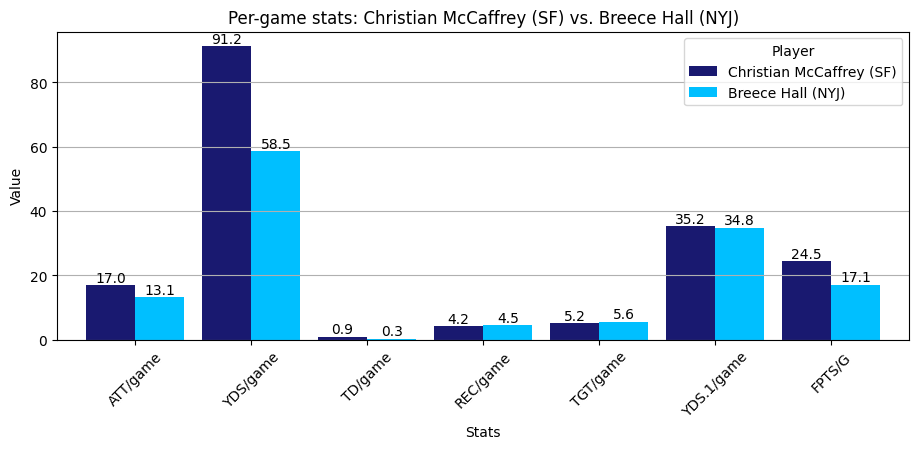

,Final Rank,Y/A,G,FPTS,FPTS/G,ATT/game,YDS/game,20+/game,TD/game,REC/game,TGT/game,YDS.1/game
Player,,,,,,,,,,,,
Christian McCaffrey (SF),1,5.4,16,391.3,24.5,17.0,91.2,0.6,0.9,4.2,5.2,35.2
Breece Hall (NYJ),4,4.5,17,290.5,17.1,13.1,58.5,0.4,0.3,4.5,5.6,34.8


In [19]:
# Prompt the user to input the name of the players
player1 = input("Enter player 1 name")
player2 = input("Enter player 2 name")

# Extract and reorder rows for the two specified players
# Filter rows where the 'Player' column contains the names entered by the user
players = df[df['Player'].str.contains(player1) | df['Player'].str.contains(player2)]
players.set_index('Player', inplace=True)
player1_match = players.index[0] if player1 in players.index[0] else players.index[1]
player2_match = players.index[1] if player2 in players.index[1] else players.index[0]
players = players.reindex([player1_match, player2_match])

# Define columns to be compared
compare_columns = [col.replace('_weighted', '') for col in avg]

# Define a function to compare per-game stats of two players
def compare(player1, player2):

    # Plot the data
    chart = players[compare_columns].T.plot(kind='bar',
                                            color=['midnightblue', 'deepskyblue'],
                                            width=0.85,
                                            figsize=(11,4))

    # Format chart
    plt.title(f'Per-game stats: {player1} vs. {player2}')
    plt.xlabel('Stats')
    plt.ylabel('Value')
    plt.grid(axis='y')
    plt.xticks(rotation=45)

    # Add data labels above the bars
    for p in chart.patches:
        chart.annotate(f'{p.get_height():.1f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 5), 
                    textcoords = 'offset points')

    plt.show()

# Call the 'compare' function which creates and displays the visualization
compare(player1_match, player2_match)
players[['Final Rank'] + final_columns]